In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating a dataframe df with all the values in csv file
df = pd.read_csv('IMDB_Movies_original.csv')

# Getting first 5 rows of the dataframe
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
# Seeing info of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [4]:
# Dropping columns not to be used 
df.drop(columns=['color', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
                'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 
                'country', 'content_rating', 'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes'],
       inplace=True)

In [5]:
# Checking for columns in the dataframe
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'gross',
       'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'num_user_for_reviews', 'language', 'budget', 'title_year',
       'imdb_score'],
      dtype='object')

Successfully droped the columns not to be used.

In [6]:
# Cehcking for null values in the columns 
(df.isna().sum()/len(df)) * 100

director_name              2.062265
num_critic_for_reviews     0.991473
duration                   0.297442
gross                     17.529248
genres                     0.000000
actor_1_name               0.138806
movie_title                0.000000
num_voted_users            0.000000
num_user_for_reviews       0.396589
language                   0.277613
budget                     9.756098
title_year                 2.141582
imdb_score                 0.000000
dtype: float64

In [7]:
# We cannot know the director name, actor_1_name and title year. 
# There are too many null values in budget and gross.
# So, dropping all the null value rows from these columns.
df.dropna(subset=['director_name', 'gross', 'actor_1_name', 'budget', 'title_year'], inplace=True)

In [8]:
df[['director_name', 'gross', 'actor_1_name', 'budget', 'title_year']].isna().sum()

director_name    0
gross            0
actor_1_name     0
budget           0
title_year       0
dtype: int64

All the null value rows in director column have been removed.

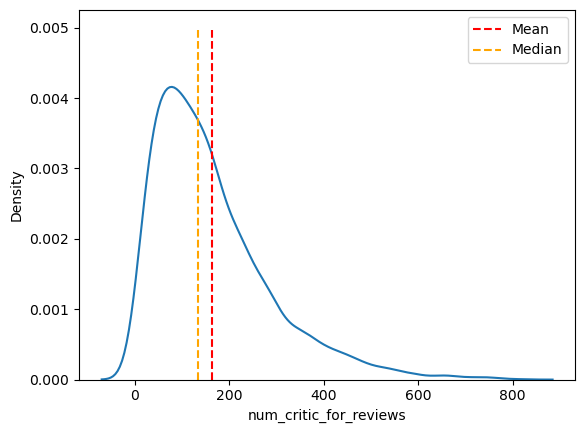

In [9]:
# Creating a kde plot for num_critic_for_reviews and drawing mean and median lines
sns.kdeplot(x='num_critic_for_reviews', data=df)

plt.vlines(df['num_critic_for_reviews'].mean(), ymin=0, ymax=0.005, linestyle='--', color='red', label='Mean')
plt.vlines(df['num_critic_for_reviews'].median(), ymin=0, ymax=0.005, linestyle='--', color='orange', label='Median')
plt.legend()
plt.show()

Since, mean and median have very different values. So, we'll be filling the null values in num_critic_for_reviews with median.

In [10]:
# Filling the null values in num_critic_for_reviews with median
df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].median(), inplace=True)

# Checking for null values in num_critic_for_reviews
df['num_critic_for_reviews'].isna().sum()

0

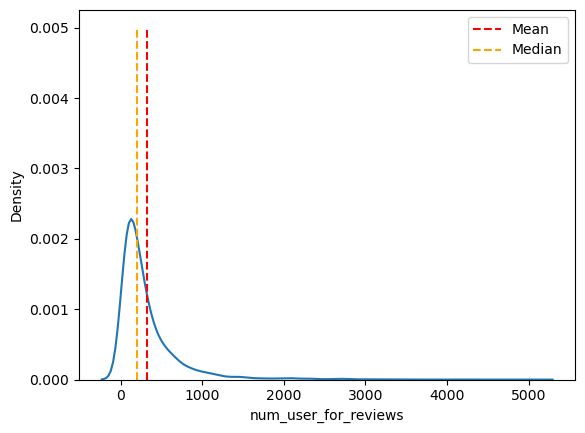

In [11]:
# Converting num_user_for_reviews column from object type to float
df['num_user_for_reviews'] = df['num_user_for_reviews'].astype('float')

# Creating a kde plot for num_critic_for_reviews and drawing mean and median lines
sns.kdeplot(x='num_user_for_reviews', data=df)

plt.vlines(df['num_user_for_reviews'].mean(), ymin=0, ymax=0.005, linestyle='--', color='red', label='Mean')
plt.vlines(df['num_user_for_reviews'].median(), ymin=0, ymax=0.005, linestyle='--', color='orange', label='Median')
plt.legend()
plt.show()

Since, mean and median have very different values. So, we'll be filling the null values in num_user_for_reviews with median.

In [12]:
# Filling the null values in num_critic_for_reviews with median
df['num_user_for_reviews'].fillna(df['num_user_for_reviews'].median(), inplace=True)

# Checking for null values in num_critic_for_reviews
df['num_user_for_reviews'].isna().sum()

0

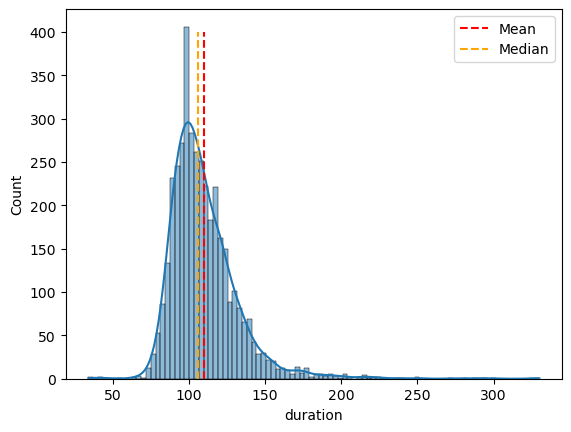

In [13]:
# Plotting histplot of duration column and seeing the mean and median
sns.histplot(x='duration', data=df, kde=True)
plt.vlines(df['duration'].mean(), ymin=0, ymax=400, linestyle='--', color='red', label='Mean')
plt.vlines(df['duration'].median(), ymin=0, ymax=400, linestyle='--', color='orange', label='Median')
plt.legend()
plt.show()

The mean and median are very close. So, we can use any to fill the missing values.

In [14]:
# Filling the null values in duration with mean values.
df['duration'].fillna(df['duration'].mean(), inplace=True)

# Checking for null values in duration column
df['duration'].isna().sum()

0

In [15]:
# Checking the count of each language 
df['language'].value_counts().sort_values(ascending=False).head()

language
English     3704
French        37
Spanish       26
Mandarin      15
German        13
Name: count, dtype: int64

English language has the highest occurance. So, we'll be filling the null values in language column with mode.

In [16]:
# Filling null values in language column with mode
df['language'].fillna(df['language'].mode().iloc[0], inplace=True)

## Checking for null values in duration column
df['language'].isna().sum()

0

In [17]:
df.isna().sum()

director_name             0
num_critic_for_reviews    0
duration                  0
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
num_user_for_reviews      0
language                  0
budget                    0
title_year                0
imdb_score                0
dtype: int64

All the null values have been filled or removed.

In [19]:
# Creating a csv file from the dataframe
df.to_csv('imdb_movies_cleaned.csv', index=False)